In [2]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

# search model's results

In [125]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_models_from_rootdir

survey_name = 'alerceZTFv7.1'
kf = 0
set_name = f'{kf}@r_test' # s_train r_train s_val r_val r_test
rootdir = f'../save/experiments/{set_name}'
cset_name = set_name.split('@')[-1]
model_names = get_models_from_rootdir(f'{rootdir}/fine-tuning')
for kmn,model_name in enumerate(model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=LSTM°mode=fine-tuning°rsc=0
[2] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=avg°mode=fine-tuning°rsc=0
[3] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[4] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=16°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[5] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=2°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[6] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[7] mdl=Par

In [129]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import filter_models

condition_dict = {
    'mdl':['ParallelTimeSelfAttn', 'SerialTimeSelfAttn'],
    #'cell':['GRU', 'LSTM'],
    #'aggr':['max', 'avg'],
}

idxs = [0,3,6] # gru max 32
idxs += [10, 13, 16]
idxs += [7, 17]

new_model_names = model_names
new_model_names = filter_models(model_names, condition_dict)
new_model_names = [model_names[idx] for idx,model_name in enumerate(model_names) if idx in idxs]
for kmn,model_name in enumerate(new_model_names):
    print(f'[{kmn}] {model_name}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[2] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=2
[4] mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[5] mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[6] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[7] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=64-64-

# metrics v/s days

In [130]:
baselines_dict = {
    'r_val':{
        'b-accuracy':65.86,
        'b-f1score':.43,
    },
    'r_test':{
        'b-accuracy':60.38,
        'b-f1score':.45,
    },
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'mdl=TimeSelfAttn°in-dims=2°te-dims=32°rsc=0': (0.949, 0.3686, 0.3686), 'mdl=TimeSelfAttn°in-dims=2°te-dims=32°rsc=2': (0.0118, 0.5882, 0.651), 'mdl=RNN°in-dims=3°te-dims=0°cell=GRU°rsc=0': (0.4157, 0.7451, 0.3098), 'mdl=TCNN°in-dims=3°te-dims=0°aggr=max°rsc=0': (0.7137, 0.3137, 0.5412)}
[0][5#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1][5#] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[2][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=2
[4][5#] mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°cell=GRU

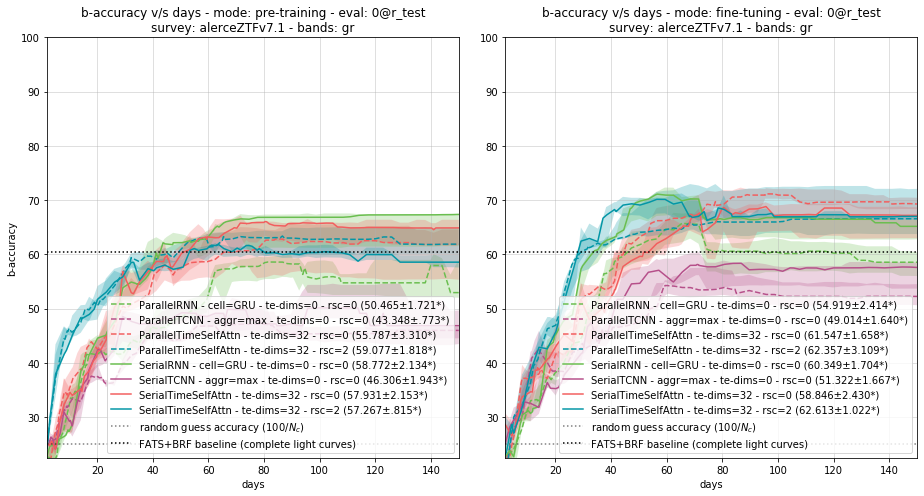

In [131]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_metric

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
]
kwargs = {
    'label_keys':label_keys,
    'set_name':set_name,
}
metric_name = 'b-accuracy' # b-accuracy b-f1score
plot_metric(rootdir, metric_name, new_model_names, baselines_dict.get(cset_name, None), **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0 (iters: 5)


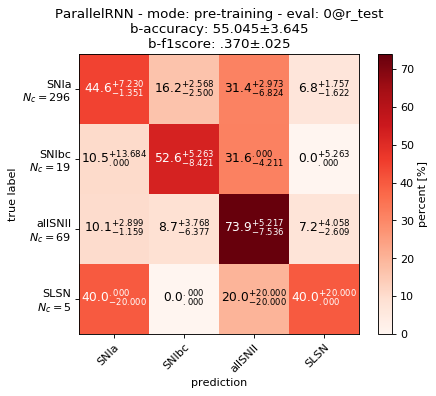

[0] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0 (iters: 5)


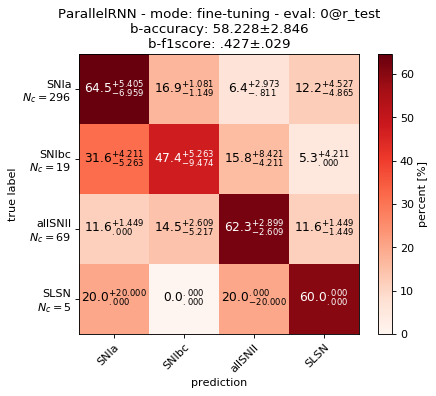

[1] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0 (iters: 5)


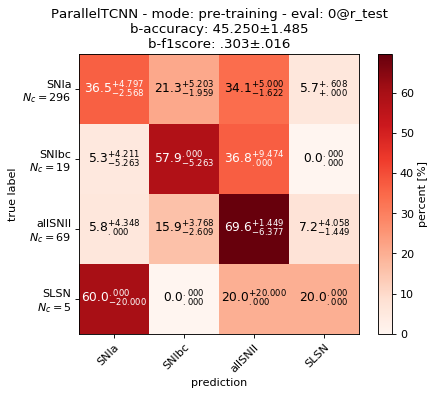

[1] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0 (iters: 5)


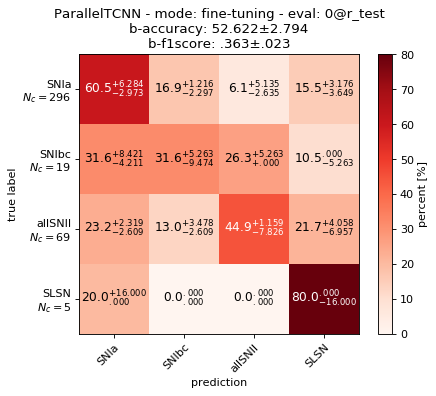

[2] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0 (iters: 5)


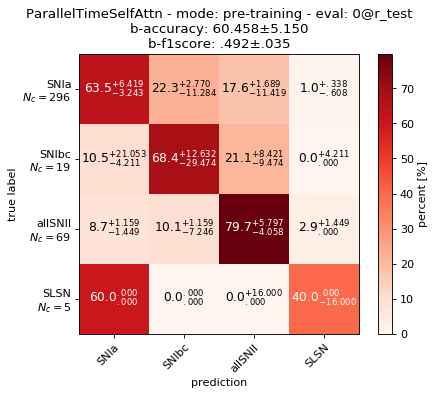

[2] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0 (iters: 5)


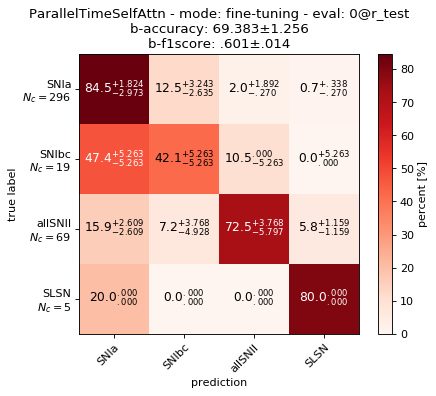

[3] mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0 (iters: 5)


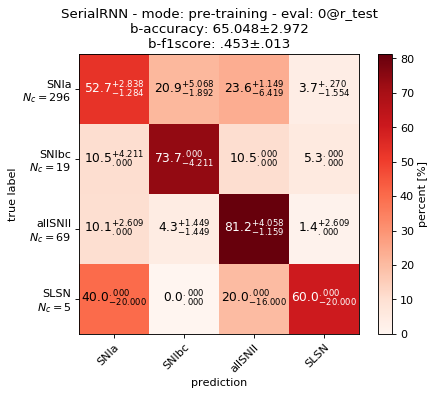

[3] mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0 (iters: 5)


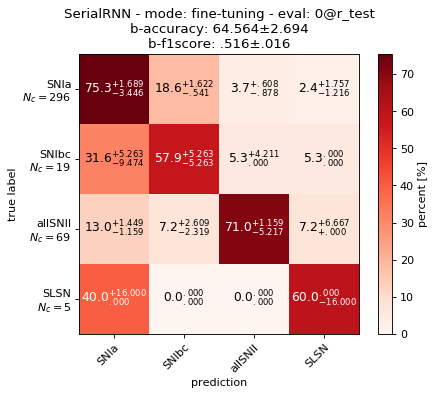

[4] mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0 (iters: 5)


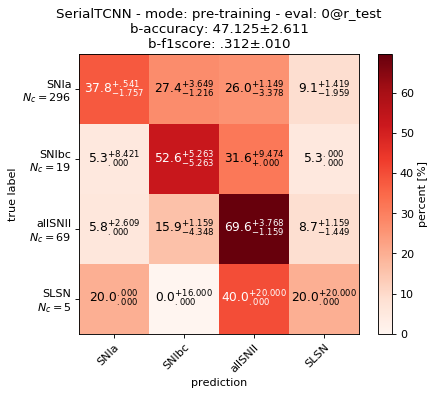

[4] mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0 (iters: 5)


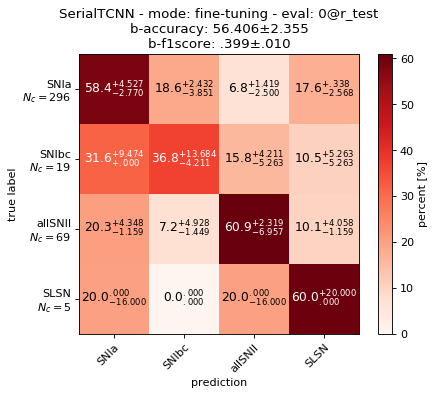

[5] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0 (iters: 5)


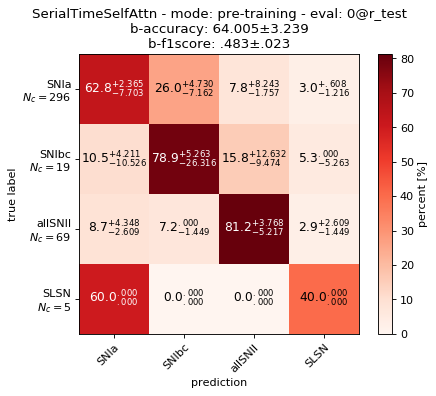

[5] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0 (iters: 5)


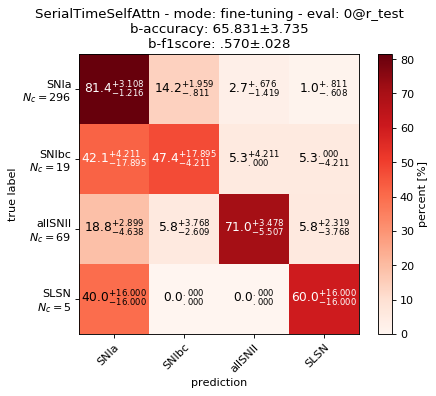

In [124]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
]
kwargs = {
    #'label_keys':label_keys,
    'lcset_name':set_name,
}
day_to_metric = 150
plot_cm(rootdir, new_model_names, day_to_metric, **kwargs)

In [110]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_query_df_table
from flamingchoripan.latex.latex_tables import LatexTable

kwargs = {
    #'arch_modes':['Parallel', 'Serial'],
    'arch_modes':['Serial'],
}
metric_names = ['b-accuracy', 'b-f1score', 'b-gmean', 'b-xentropy']
day_to_metric = 150
query_key = 'te-dims' # cell aggr te-dims
query_values = [str(i) for i in [2, 4, 8, 16, 32]]
#query_values = ['GRU', 'LSTM']
#query_values = ['avg', 'max']
info_df = get_query_df_table(rootdir, metric_names, new_model_names, day_to_metric, query_key, query_values, **kwargs)

latex_kwargs = {
    'caption':f'{query_key} {day_to_metric} {set_name}',
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0][5#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1][5#] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[2][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3][5#] mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0


KeyError: '0 [Serial]'

In [113]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_df_table
from flamingchoripan.latex.latex_tables import LatexTable
import flamingchoripan.strings as strings

def format_f(model_name):
    model_name = model_name.replace('Parallel', '')
    model_name = model_name.replace('Serial', '')
    mn_dict = strings.get_dict_from_string(model_name)
    return mn_dict['mdl']

kwargs = {
    'arch_modes':['Parallel', 'Serial'],
    #'arch_modes':['Serial'],
}
metric_names = ['b-accuracy', 'b-f1score', 'b-gmean', 'b-xentropy']
day_to_metric = 150
info_df = get_df_table(rootdir, metric_names, new_model_names, day_to_metric, format_f, **kwargs)

latex_kwargs = {
    'caption':f'{day_to_metric} {set_name}',
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'RNN [Parallel]': [], 'TCNN [Parallel]': [], 'TimeSelfAttn [Parallel]': [], 'RNN [Serial]': [], 'TCNN [Serial]': [], 'TimeSelfAttn [Serial]': []}
[0][5#] mdl=ParallelRNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[1][5#] mdl=ParallelTCNN°in-dims=3°te-dims=0°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[2][5#] mdl=ParallelTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=g64-g64-g64.r64-r64-r64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[3][5#] mdl=SerialRNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°cell=GRU°mode=fine-tuning°rsc=0
[4][5#] mdl=SerialTCNN°in-dims=3°te-dims=0°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°aggr=max°mode=fine-tuning°rsc=0
[5][5#] mdl=SerialTimeSelfAttn°in-dims=2°te-dims=32°enc-emb=64-64-64°dec-emb=g64-g64.r64-r64°mode=fine-tuning°rsc=0
[0][5#] mdl=Parallel

,RNN [Parallel],TCNN [Parallel],TimeSelfAttn [Parallel],RNN [Serial],TCNN [Serial],TimeSelfAttn [Serial]
metric=b-accuracy$|^{150}$°training-mode=pre-training,55.045±3.645,45.250±1.485,60.458±5.150,65.048±2.972,47.125±2.611,64.005±3.239
metric=b-accuracy$|_{2}^{150}$°training-mode=pre-training,50.465±1.721,43.348±.773,55.787±3.310,58.772±2.134,46.306±1.943,57.931±2.153
metric=b-f1score$|^{150}$°training-mode=pre-training,.370±.025,.303±.016,.492±.035,.453±.013,.312±.010,.483±.023
metric=b-f1score$|_{2}^{150}$°training-mode=pre-training,.342±.013,.283±.011,.447±.018,.412±.009,.292±.010,.426±.023
metric=b-gmean$|^{150}$°training-mode=pre-training,.671±.024,.586±.013,.717±.040,.742±.019,.608±.023,.741±.019
metric=b-gmean$|_{2}^{150}$°training-mode=pre-training,.626±.008,.559±.011,.672±.023,.682±.015,.593±.014,.682±.014
metric=b-xentropy$|^{150}$°training-mode=pre-training,1.336±.040,1.460±.048,1.013±.058,1.215±.045,1.252±.052,1.138±.085
metric=b-xentropy$|_{2}^{150}$°training-mode=pre-training,1.494±.013,1.502±.036,1.180±.060,1.406±.059,1.489±.051,1.412±.045
metric=b-accuracy$|^{150}$°training-mode=fine-tuning,58.228±2.846,52.622±2.794,69.383±1.256,64.564±2.694,56.406±2.355,65.831±3.735
metric=b-accuracy$|_{2}^{150}$°training-mode=fine-tuning,54.919±2.414,49.014±1.640,61.547±1.658,60.349±1.704,51.322±1.667,58.846±2.430


# mse v/s days

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_mse

plot_mse(rootdir, new_model_names)

# f1score vs mse

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_f1score_mse

plot_f1score_mse(root_folder)

# Temporal encoding

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_te_scores

plot_te_scores(root_folder, error_scale=1.5)

# Precision & recall

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs
from src.results.plots import plot_precision_recall_classes

def interact_f(model_name):
    return plot_precision_recall_classes(root_folder, model_name)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
interact(interact_f, model_name=model_names)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.plots import plot_training_losses

plot_training_losses(root_folder)

# metrics & training times table

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_days

target_days = [15, 30, 60]
latex_table_metrics_days(root_folder, target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_metrics_mean

latex_table_metrics_mean(root_folder)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.results.latex_tables import latex_table_parameters

latex_table_parameters(root_folder)

# confusion matrix plot

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import plot_cm

def interact_f(model_name, target_day):
    return plot_cm(root_folder, model_name, target_day)

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days'][::-1]
interact(interact_f, model_name=model_names, target_day=target_days)

In [ ]:
%load_ext autoreload
%autoreload 2
from ipywidgets import interact, fixed
from flamingchoripan.myUtils.files import search_for_filedirs, load_pickle
from src.results.plots import animation_cm

filedirs = search_for_filedirs(root_folder, fext='expmet', verbose=0)
model_names = list(set([fd.split('/')[-2] for fd in filedirs]))
target_days = load_pickle(filedirs[0])['days']
animation_cm(root_folder, model_names[0], target_days)